## 주성분 분석

In [50]:
import pandas as pd
import numpy as np
import matplotlib ;  import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm
%matplotlib inline

In [51]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [52]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [53]:
df_raw_x = df_raw.drop("EVAL",axis=1)
df_raw_y = df_raw["EVAL"]
display(df_raw_y.head())
display(df_raw_x.head())

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


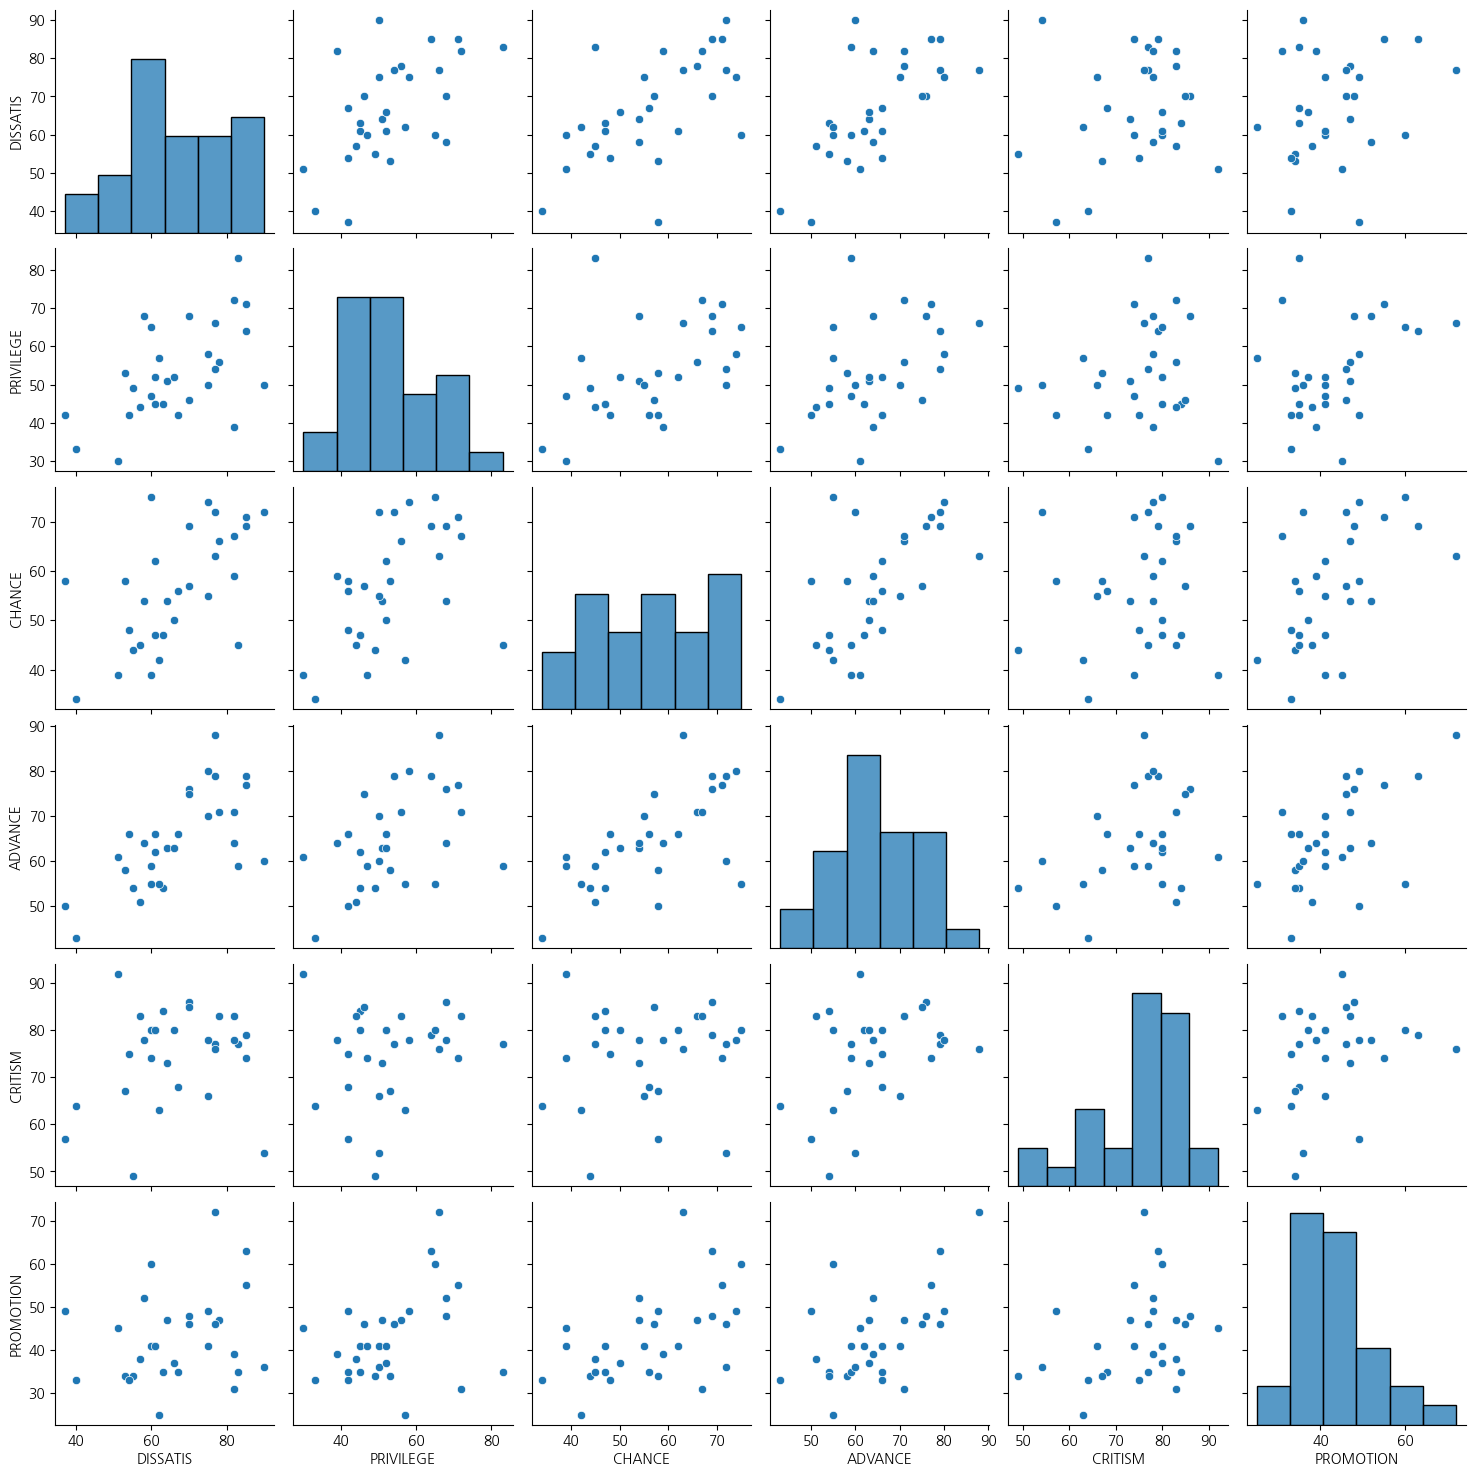

In [54]:
sns.pairplot(df_raw_x)

In [55]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [56]:
df_raw_x.describe().round(3)

# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환:ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))


# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols ) 
df_scaled.head().round(3)

# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

Scaled Data :
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape :
 (30, 6)


,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [57]:
# 216 Page
# 주성분 분석:주성분1(Prin1)~주성분6(Prin6) 생성 및 저장
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA Data :\n {}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape :
 (30, 6)


In [58]:
# 주성분 점수 저장(Prin1~Prin6, DataFrame형식) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [59]:
# 217 Page
# 주성분 분석 통계량 저장:주성분 번호, Eigenvalue, Eigenvalue ratio 
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


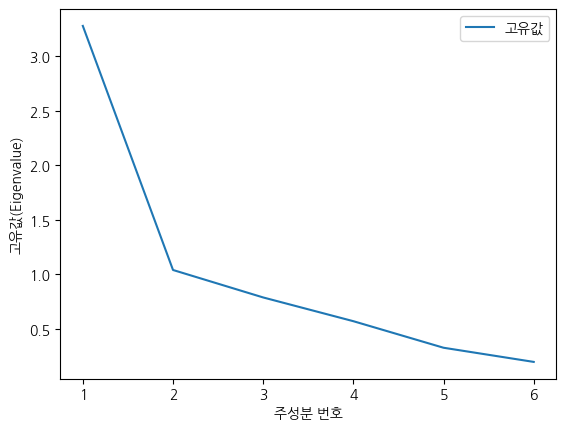

In [60]:
# 218 Page
# Scree Plot 
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], 
         label="고유값")
# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

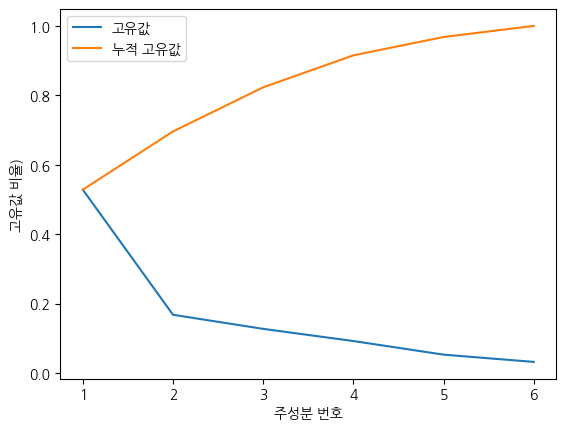

In [61]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["EigenValueRatio"], label="고유값")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [62]:
# 219 Page
# 주성분 분석 데이터의 변수 이름  
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
# 주성분 Prin1~6까지의 고유벡터 저장
# 전치 결과pd.DataFrame(pca.components_, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis=1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                            columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


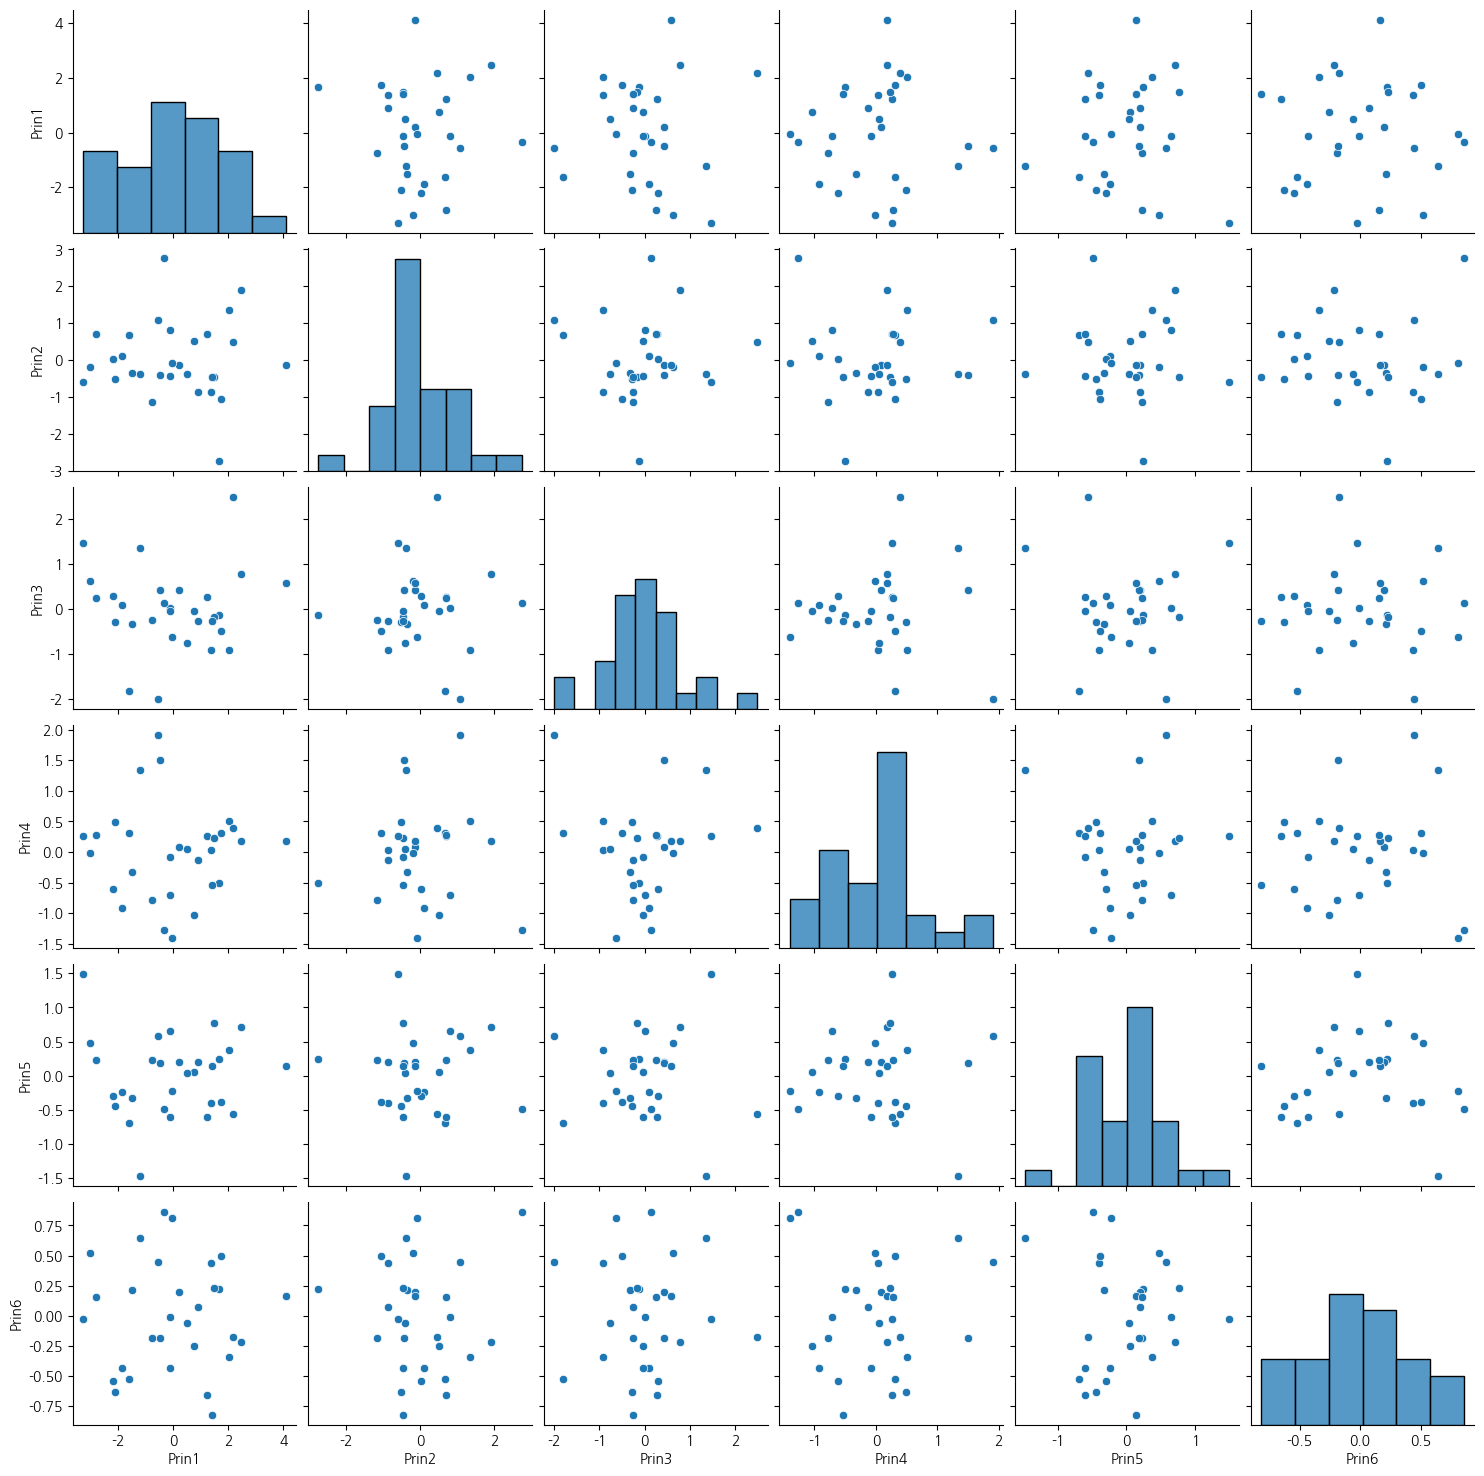

In [63]:
# 220 Page
# 산점도 행렬
sns.pairplot(df_pca)

# 상관계수
df_pca.corr().round(3)

In [64]:
# 221 Page
# 다중선형 회귀분석: 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.24e-05
Time:                        14:25:00   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [65]:
# 다중선형 회귀분석: Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.24e-05
Time:                        14:25:00   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [66]:
# 다중선형 주성분 회귀분석: 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ["Prin1", "Prin2", "Prin3"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.02e-05
Time:                        14:25:00   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [67]:
# 237 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 날짜 데이터 생성
from datetime import datetime
# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# auto_arima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [68]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/환율.csv", parse_dates = ["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


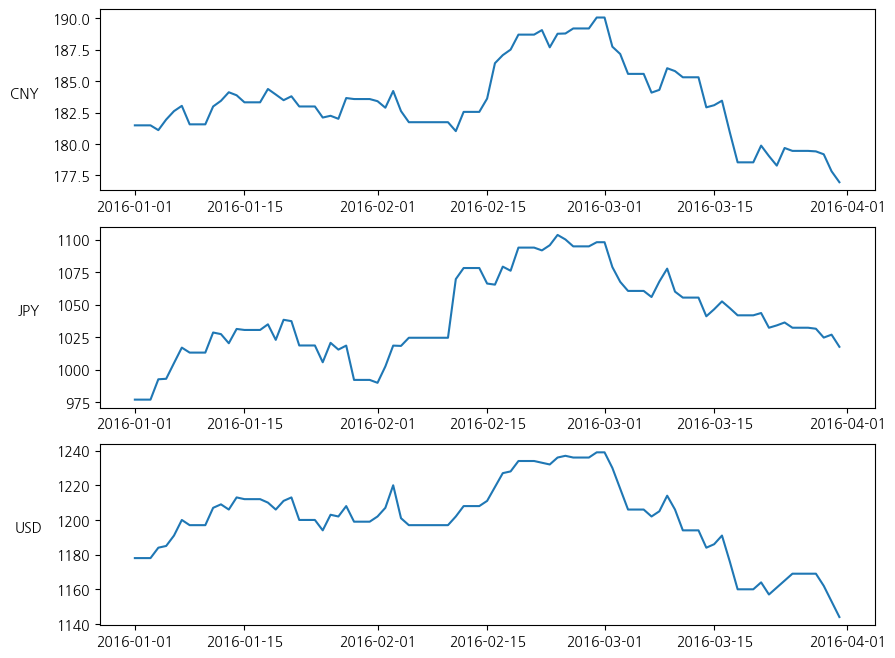

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(10,8))

for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY", "JPY", "USD"]):
    
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    
    ax.set_ylabel(currency, rotation = 0, labelpad = 20) 

In [70]:
df_CNY = df_raw[df_raw["CURRENCY"] == "CNY"].set_index("APPL_DATE")

# drop method를 이용하여 통화(CURRENCY)와 미달러 환산율(USD_CONV_DATE) 변수 제외
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# JPY 데이터 생성
df_JPY = df_raw[df_raw["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# USD 데이터 생성:실습용 데이터
df_USD = df_raw[df_raw["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [71]:
train_size = 0.9
len_idx = len(df_CNY.index)

mask = (np.arange(len_idx) / len_idx) < train_size 
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [72]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]
print("shape of train data: {}".format(df_CNY_train.shape))
print("shape of test data: {}".format(df_CNY_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


In [83]:
df_CNY_train

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94
...,...
2016-03-18,178.54
2016-03-19,178.54
2016-03-20,178.54


In [73]:
# 추가설명:Train & Test 데이터 분할:index 직접 지정
df_CNY_train = df_CNY[df_CNY.index <= "2016-03-22"]
df_CNY_test = df_CNY[df_CNY.index > "2016-03-22"]
df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


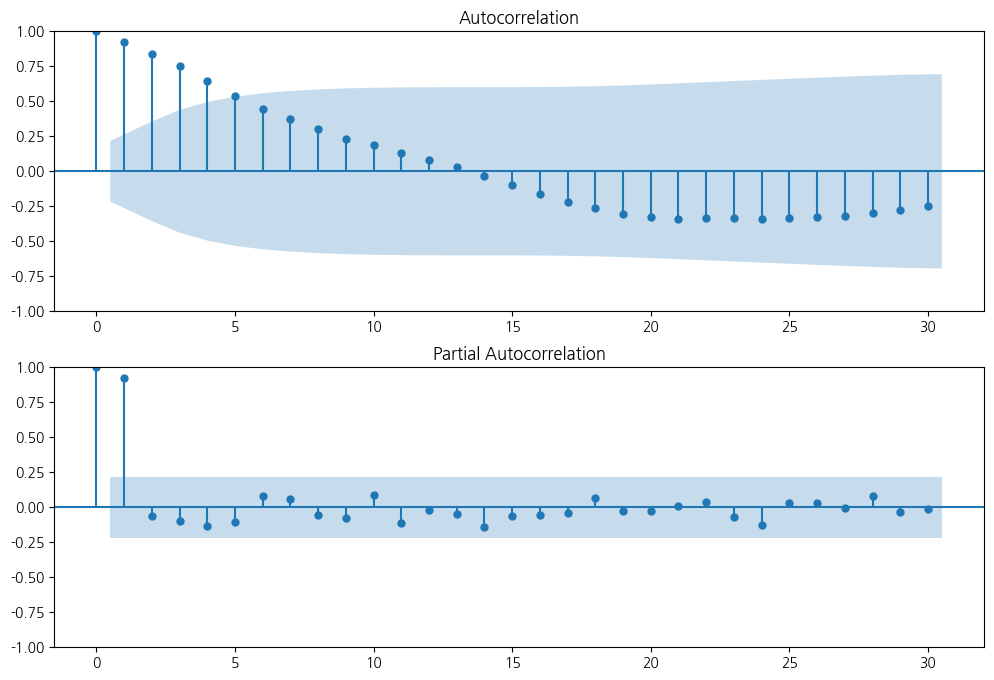

In [74]:
# 자기회귀 최대 p기간 지정
lag_size = 30
fig = plt.figure(figsize=(12,8))
# acf 그래프를 그릴 공간 생성
ax1 = fig.add_subplot(211)
# 자기상관 함수 그래프 plot_acf 함수 사용 
fig = plot_acf(df_CNY_train["STD_RATE"], lags=lag_size, ax=ax1) # ["STD_RATE"] 생략 가능
# pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)
# 부분 자기상관 함수 그래프 plot_pacf 함수 사용 
fig = plot_pacf(df_CNY_train["STD_RATE"], lags=lag_size, ax=ax2) # ["STD_RATE"] 생략 가능

In [75]:
ts_model_cny = ARIMA(df_CNY_train, order = (1, 2, 0))  # (p,d,q) 지정

# 데이터 적합
ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 06 Mar 2024   AIC                            251.025
Time:                        14:25:02   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

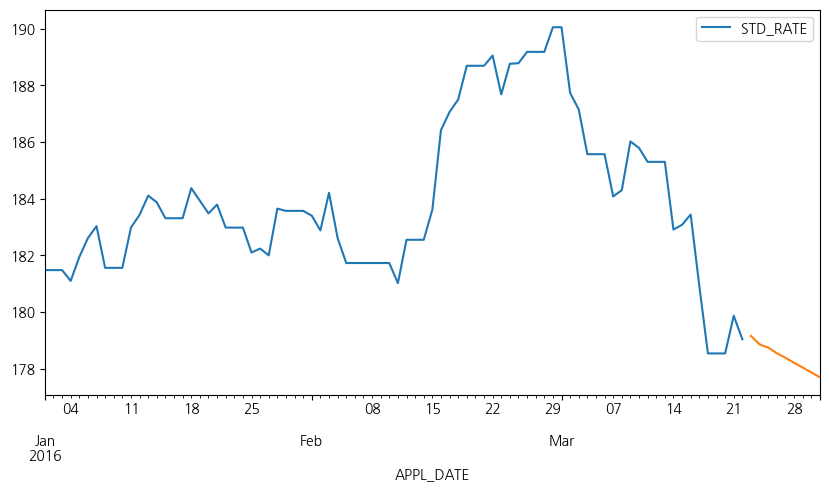

In [76]:

# 245 Page
# 예측 시작/종료 날짜 지정
start_time = df_CNY_test.index.min() # 2016-03-23
end_time = df_CNY_test.index.max() # 2016-03-31
fig, ax = plt.subplots(figsize = (10, 5))

# 예측 전까지 데이터
ax = df_CNY_train.plot(ax = ax)
# 예측 그래프 생성 함수, start: 예측 시작, end: 예측 종료, plot_insample: 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_cny.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()


In [77]:
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ= 'levels')

df_merge = df_CNY  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886777


In [78]:
ts_model = auto_arima(df_CNY_train, max_p=3, max_q=3, d=2, 
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=228.840, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=265.705, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=251.025, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=223.626, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=225.299, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=225.249, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=226.997, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.426 seconds


In [79]:
ts_model_cny = ARIMA(df_CNY_train, order = (0, 2, 1))  # (p,d,q) 지정

# 데이터 적합
ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -109.813
Date:                Wed, 06 Mar 2024   AIC                            223.626
Time:                        14:25:02   BIC                            228.390
Sample:                    01-01-2016   HQIC                           225.536
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9327      0.046    -20.235      0.000      -1.023      -0.842
sigma2         0.8886      0.112      7.904      0.000       0.668       1.109
Ljung-Box (L1) (Q):                   0.15   Jarque-

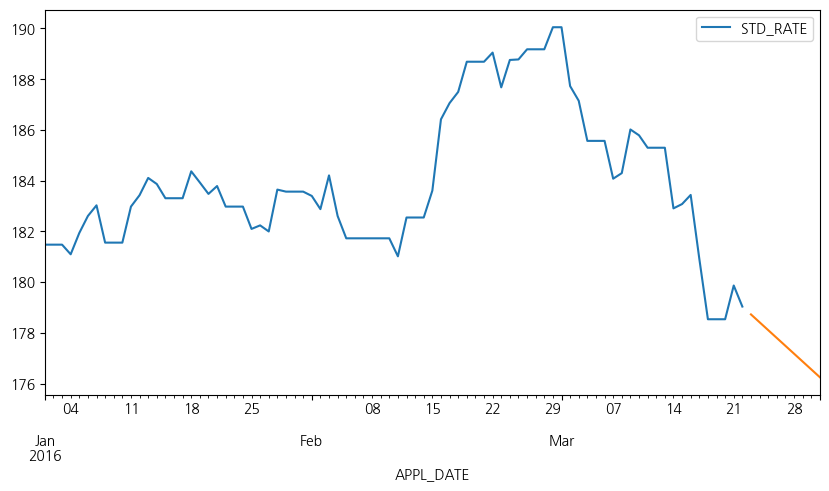

In [80]:
# 249 Page
# 예측 시작/종료 날짜 지정
start_time = df_CNY_test.index.min() # 2016-03-23
end_time = df_CNY_test.index.max() # 2016-03-31
fig, ax = plt.subplots(figsize = (10, 5))

# 예측 전까지 데이터
ax = df_CNY_train.plot(ax = ax)

# 예측 그래프 생성 함수, start: 예측 시작, end: 예측 종료, plot_insample: 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_cny.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()

In [81]:
# 250 Page
# 전체 기간의 실제값, 예측값 확인 
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ= 'levels')
df_merge = df_CNY  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480150
2016-01-04,181.10,181.480075
2016-01-05,181.94,180.972362


<Axes: xlabel='APPL_DATE'>

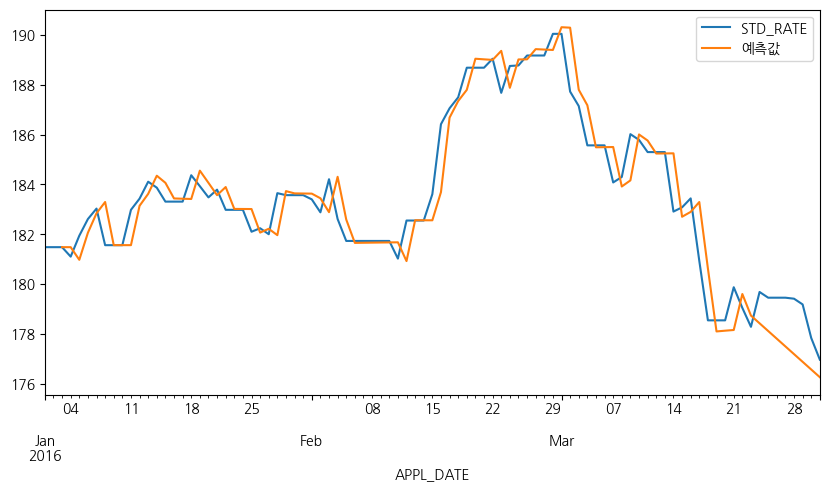

In [82]:
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10, 5))